In [1]:
import indicator as indicator
%config Completer.use_jedi = False

# World Development Indicators

To supplement the disaster dataset, we have selected 55 different world development indicators from the [World Data Bank](https://databank.worldbank.org/source/world-development-indicators). We took the per-year data from year 2000 to year 2020 and for all available countries. Detailed indicator description is given in the metadata csv file `databank_wdi_metadata.csv`, including the source, unit of measure, periodicity, aggregation method, statistical concept and methodology, development relevance and limitations. Raw data is saved in `databank_wdi_data.csv`, with the preprocessed dataset created in this notebook saved in `databank_wdi_data_clean.csv`. Cheers.

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.precision", 2)

In [3]:
wdi = pd.read_csv("datasets/wdi/databank_wdi_data.csv", na_values="..")
wdi = wdi.rename(columns={
    "Country Name":"country_name",
    "Country Code":"country_code",
    "Series Name":"indicator_name",
    "Series Code":"indicator_code",
})
wdi = wdi.rename(columns={f"{y} [YR{y}]":f"{y}" for y in range(2000,2020+1)})
wdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11935 entries, 0 to 11934
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    11935 non-null  object 
 1   country_code    11935 non-null  object 
 2   indicator_name  11935 non-null  object 
 3   indicator_code  11935 non-null  object 
 4   2000            7691 non-null   float64
 5   2001            7552 non-null   float64
 6   2002            8042 non-null   float64
 7   2003            7853 non-null   float64
 8   2004            8113 non-null   float64
 9   2005            8230 non-null   float64
 10  2006            8253 non-null   float64
 11  2007            8668 non-null   float64
 12  2008            8303 non-null   float64
 13  2009            8369 non-null   float64
 14  2010            8444 non-null   float64
 15  2011            8447 non-null   float64
 16  2012            8868 non-null   float64
 17  2013            8436 non-null  

In [4]:
wdi.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,7.69e+03,7.55e+03,8.04e+03,7.85e+03,8.11e+03,8.23e+03,8.25e+03,8.67e+03,8.30e+03,8.37e+03,...,8.45e+03,8.87e+03,8.44e+03,8.55e+03,8.27e+03,8.42e+03,8.71e+03,8.26e+03,7.23e+03,4.18e+03
mean,1.54e+10,1.59e+10,1.54e+10,1.71e+10,1.84e+10,1.99e+10,2.17e+10,2.27e+10,2.54e+10,2.49e+10,...,2.88e+10,2.87e+10,3.16e+10,3.21e+10,3.27e+10,3.26e+10,3.30e+10,3.69e+10,4.37e+10,4.21e+10
std,2.41e+11,2.49e+11,2.48e+11,2.67e+11,2.86e+11,3.05e+11,3.24e+11,3.34e+11,3.56e+11,3.55e+11,...,4.01e+11,4.15e+11,4.44e+11,4.62e+11,4.80e+11,4.88e+11,5.05e+11,5.56e+11,6.24e+11,6.00e+11
min,-4.55e+09,-2.98e+09,-1.02e+09,-3.36e+09,-2.04e+10,-2.51e+10,-2.40e+09,-2.97e+10,-9.50e+09,-8.83e+09,...,-6.01e+09,-1.63e+10,-2.96e+10,-1.52e+10,-1.95e+10,-2.89e+10,-3.73e+10,-3.45e+11,-1.69e+11,-5.63e+01
25%,8.20e+00,7.99e+00,6.73e+00,8.75e+00,9.36e+00,9.16e+00,9.50e+00,8.07e+00,9.18e+00,8.27e+00,...,8.69e+00,7.10e+00,7.95e+00,7.87e+00,7.06e+00,6.38e+00,5.61e+00,6.23e+00,7.24e+00,3.27e+00
50%,6.30e+01,6.52e+01,6.19e+01,6.30e+01,6.47e+01,6.36e+01,6.35e+01,6.13e+01,6.44e+01,6.11e+01,...,6.44e+01,6.05e+01,6.39e+01,6.30e+01,5.59e+01,5.01e+01,4.74e+01,5.04e+01,5.83e+01,4.74e+01
75%,4.70e+03,6.01e+03,5.26e+03,4.77e+03,3.83e+03,3.21e+03,3.51e+03,3.31e+03,3.78e+03,3.45e+03,...,3.65e+03,3.20e+03,3.88e+03,3.66e+03,3.45e+03,1.83e+03,1.93e+03,2.52e+03,4.70e+03,1.26e+04
max,1.04e+13,1.07e+13,1.11e+13,1.15e+13,1.27e+13,1.36e+13,1.43e+13,1.46e+13,1.49e+13,1.46e+13,...,1.58e+13,1.67e+13,1.72e+13,1.81e+13,1.87e+13,1.90e+13,1.99e+13,2.16e+13,2.35e+13,2.13e+13


In [5]:
print(f"Index unique: {wdi.index.is_unique}")
print(f"Dataframe has dupliates: {sum(wdi.duplicated()) > 0}, n={sum(wdi.duplicated())}")

Index unique: True
Dataframe has dupliates: False, n=0


In [6]:
print(f"Number of countries: {len(wdi.country_name.unique())}")
indicators = wdi.indicator_name.unique()
print(f"Number of indicators:{len(indicators)}")
print(f"Indicators:")
for i, s in enumerate(indicators):
    print(f"\t{i} --> {s}")

Number of countries: 217
Number of indicators:55
Indicators:
	0 --> Adolescent fertility rate (births per 1,000 women ages 15-19)
	1 --> Agriculture, forestry, and fishing, value added (% of GDP)
	2 --> Annual freshwater withdrawals, total (% of internal resources)
	3 --> Births attended by skilled health staff (% of total)
	4 --> CO2 emissions (metric tons per capita)
	5 --> Contraceptive prevalence, any methods (% of women ages 15-49)
	6 --> Domestic credit provided by financial sector (% of GDP)
	7 --> Electric power consumption (kWh per capita)
	8 --> Energy use (kg of oil equivalent per capita)
	9 --> Exports of goods and services (% of GDP)
	10 --> External debt stocks, total (DOD, current US$)
	11 --> Fertility rate, total (births per woman)
	12 --> Foreign direct investment, net inflows (BoP, current US$)
	13 --> Forest area (sq. km)
	14 --> GDP (current US$)
	15 --> GDP growth (annual %)
	16 --> GNI per capita, Atlas method (current US$)
	17 --> GNI per capita, PPP (current in

In [7]:
interesting_indicators = [
    "Population, total",
    "Population density (people per sq. km of land area)",
    "Surface area (sq. km)",
    "School enrollment, secondary (% gross)",
    "GDP (current US$)",
    "Energy use (kg of oil equivalent per capita)",
]

print(f"A list of some interesing indicators:")
for i, s in enumerate(indicators):
    if s in interesting_indicators:
        print(f"\t{i} --> {s}")

A list of some interesing indicators:
	8 --> Energy use (kg of oil equivalent per capita)
	14 --> GDP (current US$)
	36 --> Population density (people per sq. km of land area)
	38 --> Population, total
	47 --> School enrollment, secondary (% gross)
	49 --> Surface area (sq. km)


In [8]:
croatia = wdi[wdi.country_name == "Croatia"]
# croatia
croatia[croatia.indicator_name.isin(interesting_indicators)]

,country_name,country_code,indicator_name,indicator_code,2000,2001,2002,2003,2004,2005,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
2648,Croatia,HRV,Energy use (kg of oil equivalent per capita),EG.USE.PCAP.KG.OE,1.88e+03,2.02e+03,2.08e+03,2.23e+03,2.23e+03,2.26e+03,...,2.14e+03,2.02e+03,1.98e+03,1.90e+03,NaN,NaN,NaN,NaN,NaN,NaN
2654,Croatia,HRV,GDP (current US$),NY.GDP.MKTP.CD,2.16e+10,2.31e+10,2.68e+10,3.47e+10,4.16e+10,4.54e+10,...,6.25e+10,5.66e+10,5.82e+10,5.76e+10,4.95e+10,5.16e+10,5.55e+10,6.14e+10,6.08e+10,5.60e+10
2676,Croatia,HRV,Population density (people per sq. km of land ...,EN.POP.DNST,7.99e+01,7.69e+01,7.69e+01,7.70e+01,7.69e+01,7.70e+01,...,7.65e+01,7.63e+01,7.60e+01,7.49e+01,7.43e+01,7.38e+01,7.29e+01,7.22e+01,7.18e+01,7.15e+01
2678,Croatia,HRV,"Population, total",SP.POP.TOTL,4.47e+06,4.30e+06,4.30e+06,4.30e+06,4.30e+06,4.31e+06,...,4.28e+06,4.27e+06,4.26e+06,4.24e+06,4.20e+06,4.17e+06,4.12e+06,4.09e+06,4.07e+06,4.05e+06
2687,Croatia,HRV,"School enrollment, secondary (% gross)",SE.SEC.ENRR,8.55e+01,8.58e+01,8.69e+01,8.83e+01,NaN,9.32e+01,...,9.92e+01,9.89e+01,9.93e+01,9.87e+01,9.87e+01,9.89e+01,9.94e+01,1.00e+02,1.00e+02,NaN
2689,Croatia,HRV,Surface area (sq. km),AG.SRF.TOTL.K2,5.65e+04,5.65e+04,5.65e+04,5.65e+04,5.66e+04,5.66e+04,...,5.66e+04,8.81e+04,8.81e+04,8.81e+04,8.81e+04,8.81e+04,8.81e+04,8.81e+04,NaN,NaN


In [9]:
haiti = wdi[wdi.country_name == "Haiti"]
haiti[haiti.indicator_name.isin(interesting_indicators)]

,country_name,country_code,indicator_name,indicator_code,2000,2001,2002,2003,2004,2005,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
4628,Haiti,HTI,Energy use (kg of oil equivalent per capita),EG.USE.PCAP.KG.OE,2.38e+02,2.39e+02,2.64e+02,2.49e+02,2.53e+02,3.70e+02,...,3.89e+02,3.97e+02,3.94e+02,3.94e+02,NaN,NaN,NaN,NaN,NaN,NaN
4634,Haiti,HTI,GDP (current US$),NY.GDP.MKTP.CD,6.87e+09,6.36e+09,6.11e+09,5.00e+09,6.01e+09,7.05e+09,...,1.30e+10,1.37e+10,1.45e+10,1.48e+10,1.49e+10,1.37e+10,1.42e+10,1.60e+10,1.43e+10,1.34e+10
4656,Haiti,HTI,Population density (people per sq. km of land ...,EN.POP.DNST,3.07e+02,3.12e+02,3.18e+02,3.23e+02,3.28e+02,3.34e+02,...,3.66e+02,3.72e+02,3.77e+02,3.83e+02,3.88e+02,3.93e+02,3.98e+02,4.04e+02,4.09e+02,4.14e+02
4658,Haiti,HTI,"Population, total",SP.POP.TOTL,8.46e+06,8.61e+06,8.75e+06,8.90e+06,9.05e+06,9.20e+06,...,1.01e+07,1.03e+07,1.04e+07,1.05e+07,1.07e+07,1.08e+07,1.10e+07,1.11e+07,1.13e+07,1.14e+07
4667,Haiti,HTI,"School enrollment, secondary (% gross)",SE.SEC.ENRR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4669,Haiti,HTI,Surface area (sq. km),AG.SRF.TOTL.K2,2.78e+04,2.78e+04,2.78e+04,2.78e+04,2.78e+04,2.78e+04,...,2.78e+04,2.78e+04,2.78e+04,2.78e+04,2.78e+04,2.78e+04,2.78e+04,2.78e+04,NaN,NaN


## Discussion

Some data is missing. For some countries like Haiti, there was no information on `School enrollment, secondary (% gross)`, whereas for Croatia, there was no data about it only for year 2020. Missing data will need to be taken care of when applying machine learning models. Different models have different "preferences" which we will need to take care of ad hoc. It will likely make sense to interpolate some of the missing fields. For example, if the country surface area was reported for the past 3 years, but was not reported for year 2020 (like for Croatia), we might just want to copy the surface area from the previous year, as it very likely did not change. Or we could compute it by dividing the population by the population density. Overall, data polishing might require a lot of work and we should be cautious about it when reaching towards machine learning models.

TODO Analyse correlations in the data

In [10]:
def correlation_indicators_of_country(df, c_name):
    country_df = df[df.country_name == c_name]
    indicators = {}
    for index, row in country_df.iterrows():
        indicators[index] = row["indicator_name"]
    country_df = country_df.filter(regex="([0-9]{4})")
    country_df_t = country_df.transpose().dropna(axis=1).rename(columns=indicators)
    return country_df_t.corr()

def correlation_countries(df, c1_name, c2_name):
    country1_df = df[df.country_name == c1_name]
    country2_df = df[df.country_name == c2_name]
    return country1_df.corrwith(country2_df, axis=1)

In [11]:
correlation_indicators_of_country(wdi, "Croatia")

,"Agriculture, forestry, and fishing, value added (% of GDP)",Exports of goods and services (% of GDP),Forest area (sq. km),GDP (current US$),GDP growth (annual %),"GNI per capita, Atlas method (current US$)","GNI, Atlas method (current US$)",Gross capital formation (% of GDP),Imports of goods and services (% of GDP),"Industry (including construction), value added (% of GDP)","Inflation, GDP deflator (annual %)",Merchandise trade (% of GDP),Military expenditure (% of GDP),Mobile cellular subscriptions (per 100 people),"Personal remittances, received (current US$)",Population density (people per sq. km of land area),Population growth (annual %),"Population, total","Prevalence of HIV, total (% of population ages 15-49)",Urban population growth (annual %)
"Agriculture, forestry, and fishing, value added (% of GDP)",1.00,-0.77,-0.91,-0.73,0.24,-0.81,-0.78,0.26,-0.43,0.85,7.64e-01,-0.63,0.79,-0.80,-0.86,0.79,-1.94e-01,0.77,NaN,-0.25
Exports of goods and services (% of GDP),-0.77,1.00,0.71,0.32,0.12,0.44,0.38,-0.35,0.69,-0.85,-6.21e-01,0.84,-0.42,0.38,0.77,-0.86,-2.07e-01,-0.83,NaN,-0.14
Forest area (sq. km),-0.91,0.71,1.00,0.80,-0.49,0.89,0.86,-0.26,0.38,-0.87,-7.51e-01,0.64,-0.74,0.83,0.96,-0.85,1.41e-01,-0.85,NaN,0.20
GDP (current US$),-0.73,0.32,0.80,1.00,-0.43,0.97,0.97,0.05,0.13,-0.52,-3.98e-01,0.26,-0.84,0.94,0.73,-0.44,4.06e-01,-0.46,NaN,0.42
GDP growth (annual %),0.24,0.12,-0.49,-0.43,1.00,-0.52,-0.52,0.27,0.37,0.28,4.25e-01,0.04,0.19,-0.42,-0.36,0.23,-4.81e-02,0.25,NaN,-0.07
"GNI per capita, Atlas method (current US$)",-0.81,0.44,0.89,0.97,-0.52,1.00,1.00,-0.11,0.14,-0.66,-5.77e-01,0.35,-0.83,0.96,0.81,-0.56,3.20e-01,-0.57,NaN,0.35
"GNI, Atlas method (current US$)",-0.78,0.38,0.86,0.97,-0.52,1.00,1.00,-0.10,0.08,-0.61,-5.45e-01,0.28,-0.83,0.96,0.76,-0.50,3.46e-01,-0.50,NaN,0.37
Gross capital formation (% of GDP),0.26,-0.35,-0.26,0.05,0.27,-0.11,-0.10,1.00,0.36,0.54,6.75e-01,0.03,-0.10,-0.08,-0.09,0.17,3.87e-01,0.14,NaN,0.37
Imports of goods and services (% of GDP),-0.43,0.69,0.38,0.13,0.37,0.14,0.08,0.36,1.00,-0.38,-5.44e-02,0.87,-0.28,0.11,0.57,-0.69,1.75e-02,-0.69,NaN,0.07
"Industry (including construction), value added (% of GDP)",0.85,-0.85,-0.87,-0.52,0.28,-0.66,-0.61,0.54,-0.38,1.00,8.09e-01,-0.65,0.47,-0.60,-0.82,0.84,9.40e-02,0.82,NaN,0.03


TODO Use pandas bfill to interpolate missing values or something like that

In [13]:
wdi_filled = wdi.bfill(axis=1)

,country_name,country_code,indicator_name,indicator_code,2000,2001,2002,2003,2004,2005,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
2648,Croatia,HRV,Energy use (kg of oil equivalent per capita),EG.USE.PCAP.KG.OE,1.88e+03,2.02e+03,2.08e+03,2.23e+03,2.23e+03,2.26e+03,...,2.14e+03,2.02e+03,1.98e+03,1.90e+03,NaN,NaN,NaN,NaN,NaN,NaN
2654,Croatia,HRV,GDP (current US$),NY.GDP.MKTP.CD,2.16e+10,2.31e+10,2.68e+10,3.47e+10,4.16e+10,4.54e+10,...,6.25e+10,5.66e+10,5.82e+10,5.76e+10,4.95e+10,5.16e+10,5.55e+10,6.14e+10,6.08e+10,5.60e+10
2676,Croatia,HRV,Population density (people per sq. km of land ...,EN.POP.DNST,7.99e+01,7.69e+01,7.69e+01,7.70e+01,7.69e+01,7.70e+01,...,7.65e+01,7.63e+01,7.60e+01,7.49e+01,7.43e+01,7.38e+01,7.29e+01,7.22e+01,7.18e+01,7.15e+01
2678,Croatia,HRV,"Population, total",SP.POP.TOTL,4.47e+06,4.30e+06,4.30e+06,4.30e+06,4.30e+06,4.31e+06,...,4.28e+06,4.27e+06,4.26e+06,4.24e+06,4.20e+06,4.17e+06,4.12e+06,4.09e+06,4.07e+06,4.05e+06
2687,Croatia,HRV,"School enrollment, secondary (% gross)",SE.SEC.ENRR,8.55e+01,8.58e+01,8.69e+01,8.83e+01,NaN,9.32e+01,...,9.92e+01,9.89e+01,9.93e+01,9.87e+01,9.87e+01,9.89e+01,9.94e+01,1.00e+02,1.00e+02,NaN
2689,Croatia,HRV,Surface area (sq. km),AG.SRF.TOTL.K2,5.65e+04,5.65e+04,5.65e+04,5.65e+04,5.66e+04,5.66e+04,...,5.66e+04,8.81e+04,8.81e+04,8.81e+04,8.81e+04,8.81e+04,8.81e+04,8.81e+04,NaN,NaN


In [15]:
croatia_filled = wdi_filled[wdi_filled.country_name == "Croatia"]
croatia_filled[croatia_filled.indicator_name.isin(interesting_indicators)]

,country_name,country_code,indicator_name,indicator_code,2000,2001,2002,2003,2004,2005,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
2648,Croatia,HRV,Energy use (kg of oil equivalent per capita),EG.USE.PCAP.KG.OE,1876.81,2024.55,2081.6,2232.49,2230.9,2261.48,...,2140.44,2020.75,1983.87,1897.84,NaN,NaN,NaN,NaN,NaN,NaN
2654,Croatia,HRV,GDP (current US$),NY.GDP.MKTP.CD,21633759450.79,23054778851.28,26813968850.52,34682900712.67,41587470546.79,45376744001.8,...,62537851352.49,56580819623.85,58194069434.14,57639588805.59,49525747503.81,51601147665.81,55481644098.05,61375222347.03,60752588976.32,55966581780.17
2676,Croatia,HRV,Population density (people per sq. km of land ...,EN.POP.DNST,79.92,76.9,76.95,76.97,76.92,77.02,...,76.49,76.26,76.05,74.9,74.28,73.76,72.88,72.24,71.84,71.52
2678,Croatia,HRV,"Population, total",SP.POP.TOTL,4468302.0,4299642.0,4302174.0,4303399.0,4304600.0,4310145.0,...,4280622.0,4267558.0,4255689.0,4238389.0,4203604.0,4174349.0,4124531.0,4087843.0,4065253.0,4047200.0
2687,Croatia,HRV,"School enrollment, secondary (% gross)",SE.SEC.ENRR,85.53,85.76,86.87,88.34,93.17,93.17,...,99.19,98.92,99.35,98.7,98.65,98.87,99.4,100.08,100.12,NaN
2689,Croatia,HRV,Surface area (sq. km),AG.SRF.TOTL.K2,56540.0,56540.0,56540.0,56540.0,56590.0,56590.0,...,56590.0,88073.0,88073.0,88073.0,88073.0,88073.0,88073.0,88070.0,NaN,NaN


TODO: Make sure that there are no obvious outliers by plotting some boxplots

In [58]:
indicators_grouped = wdi.groupby(by=["indicator_name"], as_index=True)
indicators_grouped.agg(['max', 'min', 'count', 'median', 'mean'])

2000                  \
                                                         max       min count   
indicator_name                                                                 
Adolescent fertility rate (births per 1,000 wom...  2.17e+02  1.07e+00   194   
Agriculture, forestry, and fishing, value added...  7.61e+01  8.73e-02   184   
Annual freshwater withdrawals, total (% of inte...       NaN       NaN     0   
Births attended by skilled health staff (% of t...  1.00e+02  5.60e+00   142   
CO2 emissions (metric tons per capita)              3.67e+01  0.00e+00   191   
Contraceptive prevalence, any methods (% of wom...  8.38e+01  4.30e+00    78   
Domestic credit provided by financial sector (%...  2.90e+02  8.23e+00    17   
Electric power consumption (kWh per capita)         2.62e+04  2.28e+01   140   
Energy use (kg of oil equivalent per capita)        1.84e+04  1.30e+02   140   
Exports of goods and services (% of GDP)            1.88e+02  5.39e-01   176   
External debt stocks, total (DOD, current US$)      2.43e+11  7.21e+07   119   
Fertility rate, total (births per woman)            7.68e+00  9.50e-01   200   
Foreign direct investment, net inflows (BoP, cu...  3.49e+11 -4.55e+09   189   
Forest area (sq. km)                                8.09e+06  0.00e+00   214   
GDP (current US$)                                   1.03e+13  1.37e+07   200   
GDP growth (annual %)                               1.97e+01 -1.43e+01   193   
GNI per capita, Atlas method (current US$)          7.89e+04  1.30e+02   183   
GNI per capita, PPP (current international $)       1.03e+05  4.40e+02   182   
GNI, Atlas method (current US$)                     1.01e+13  1.13e+08   183   
GNI, PPP (current international $)                  1.04e+13  1.61e+08   182   
Gross capital formation (% of GDP)                  5.03e+01  0.00e+00   166   
High-technology exports (% of manufactured expo...       NaN       NaN     0   
Immunization, measles (% of children ages 12-23...  9.90e+01  8.00e+00   189   
Imports of goods and services (% of GDP)            1.76e+02  6.27e-01   176   
Income share held by lowest 20%                     1.04e+01  1.10e+00    50   
Industry (including construction), value added ...  8.48e+01  4.25e+00   180   
Inflation, GDP deflator (annual %)                  2.63e+03 -9.38e+00   192   
Life expectancy at birth, total (years)             8.11e+01  3.94e+01   201   
Merchandise trade (% of GDP)                        2.83e+02  7.81e+00   188   
Military expenditure (% of GDP)                     3.27e+01  0.00e+00   144   
Mobile cellular subscriptions (per 100 people)      8.25e+01  0.00e+00   204   
Mortality rate, under-5 (per 1,000 live births)     2.28e+02  3.90e+00   193   
Net barter terms of trade index (2000 = 100)        1.00e+02  1.00e+02   202   
Net migration                                            NaN       NaN     0   
Net official development assistance and officia...  1.75e+09 -1.98e+08   176   
Personal remittances, received (current US$)        1.29e+10  4.64e+05   151   
Population density (people per sq. km of land a...  2.14e+04  1.37e-01   216   
Population growth (annual %)                        5.62e+00 -4.08e+00   217   
Population, total                                   1.26e+09  9.39e+03   217   
Poverty headcount ratio at $1.90 a day (2011 PP...  8.62e+01  0.00e+00    50   
Poverty headcount ratio at national poverty lin...  6.90e+01  1.53e+01    19   
Prevalence of HIV, total (% of population ages ...  2.63e+01  1.00e-01   134   
Prevalence of underweight, weight for age (% of...  4.31e+01  1.10e+00    56   
Primary completion rate, total (% of relevant a...  1.19e+02  1.66e+01   125   
Revenue, excluding grants (% of GDP)                7.91e+01  5.25e+00    82   
School enrollment, primary (% gross)                1.40e+02  2.10e+01   165   
School enrollment, primary and secondary (gross...  1.16e+00  5.62e-01   136   
School enrollment, secondary (% gross)              1.52

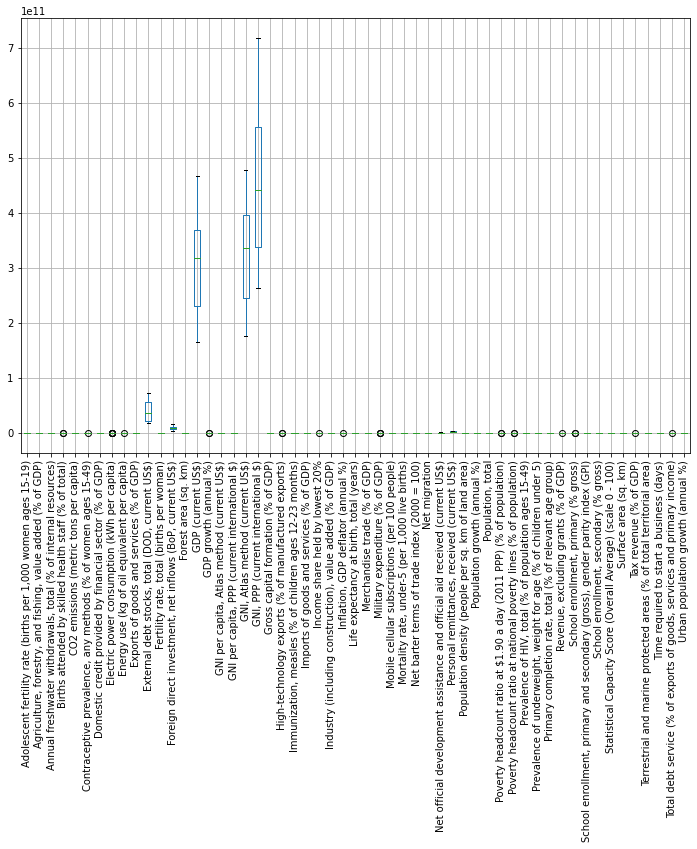

In [59]:
fig, ax = plt.subplots(1, figsize=(12, 8))
indicators_grouped.agg(['mean']).T.boxplot(rot=90)
plt.show()

TODO: Merge with the disasters

In [23]:
disasters = pd.read_csv("datasets/emdat/emdat_public_2021_11_06_clean.csv")
disasters = disasters.drop(["Unnamed: 0"], axis=1)
disasters

,Dis No,Year,Disaster Type,Country,ISO,Continent,Dis Mag Value,Dis Mag Scale,Latitude,Longitude,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,Total Affected,Total Damages ('000 US$)
0,2010-0017-HTI,2010,Earthquake,Haiti,HTI,Americas,7.0,Richter,18.44,-72.57,2010,1.0,12.0,2010,1.0,12.0,222570.0,3.70e+06,8.00e+06
1,2004-0659-IDN,2004,Earthquake,Indonesia,IDN,Asia,9.0,Richter,3.29,95.98,2004,12.0,26.0,2004,12.0,26.0,165708.0,5.33e+05,4.45e+06
2,2008-0184-MMR,2008,Storm,Myanmar,MMR,Asia,215.0,Kph,NaN,NaN,2008,5.0,2.0,2008,5.0,3.0,138366.0,2.42e+06,4.00e+06
3,2008-0192-CHN,2008,Earthquake,China,CHN,Asia,8.0,Richter,31.00,103.32,2008,5.0,12.0,2008,5.0,12.0,87476.0,4.60e+07,8.50e+07
4,2005-0575-PAK,2005,Earthquake,Pakistan,PAK,Asia,8.0,Richter,34.54,73.59,2005,10.0,8.0,2005,10.0,8.0,73338.0,5.13e+06,5.20e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2016-0216-IDN,2016,Landslide,Indonesia,IDN,Asia,NaN,NaN,NaN,NaN,2016,6.0,17.0,2016,6.0,21.0,62.0,NaN,2.50e+04
996,2002-0423-PHL,2002,Storm,Philippines (the),PHL,Asia,160.0,Kph,NaN,NaN,2002,7.0,13.0,2002,7.0,13.0,62.0,1.10e+04,5.66e+03
997,2003-0250-BGD,2003,Extreme temperature,Bangladesh,BGD,Asia,40.0,°C,NaN,NaN,2003,5.0,10.0,2003,6.0,12.0,62.0,NaN,NaN
998,2005-0398-IND,2005,Flood,India,IND,Asia,55740.0,Km2,NaN,NaN,2005,7.0,2.0,2005,7.0,15.0,62.0,4.90e+04,NaN


In [24]:
wdi_with_disasters = wdi.merge(disasters, left_on=["country_name"], right_on=["Country"], how="left")
wdi_with_disasters

,country_name,country_code,indicator_name,indicator_code,2000,2001,2002,2003,2004,2005,...,Longitude,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,Total Affected,Total Damages ('000 US$)
0,Afghanistan,AFG,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,153.95,150.19,146.43,143.76,141.10,138.43,...,NaN,2002.0,4.0,10.0,2002.0,4.0,10.0,2500.0,NaN,NaN
1,Afghanistan,AFG,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,153.95,150.19,146.43,143.76,141.10,138.43,...,NaN,2008.0,1.0,5.0,2008.0,2.0,15.0,1317.0,170684.0,NaN
2,Afghanistan,AFG,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,153.95,150.19,146.43,143.76,141.10,138.43,...,69.31,2002.0,3.0,25.0,2002.0,3.0,25.0,1000.0,91228.0,NaN
3,Afghanistan,AFG,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,153.95,150.19,146.43,143.76,141.10,138.43,...,NaN,2000.0,1.0,NaN,2000.0,1.0,NaN,507.0,NaN,NaN
4,Afghanistan,AFG,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,153.95,150.19,146.43,143.76,141.10,138.43,...,66.43,2014.0,4.0,24.0,2014.0,5.0,2.0,431.0,140100.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50375,Zimbabwe,ZWE,Urban population growth (annual %),SP.URB.GROW,1.72,1.57,1.46,-0.07,-0.22,-0.07,...,NaN,2013.0,1.0,NaN,2013.0,1.0,NaN,125.0,9700.0,NaN
50376,Zimbabwe,ZWE,Urban population growth (annual %),SP.URB.GROW,1.72,1.57,1.46,-0.07,-0.22,-0.07,...,NaN,2000.0,1.0,NaN,2000.0,1.0,NaN,93.0,1675.0,NaN
50377,Zimbabwe,ZWE,Urban population growth (annual %),SP.URB.GROW,1.72,1.57,1.46,-0.07,-0.22,-0.07,...,NaN,2005.0,12.0,10.0,2006.0,5.0,18.0,73.0,980.0,NaN
50378,Zimbabwe,ZWE,Urban population growth (annual %),SP.URB.GROW,1.72,1.57,1.46,-0.07,-0.22,-0.07,...,NaN,2000.0,1.0,26.0,2000.0,3.0,27.0,70.0,266000.0,72900.0


TODO: Use small multiples to create tons of graphs
